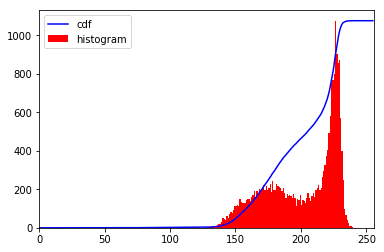

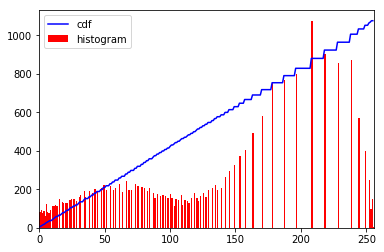

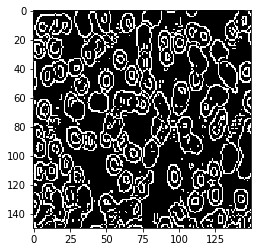

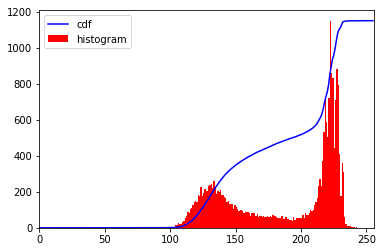

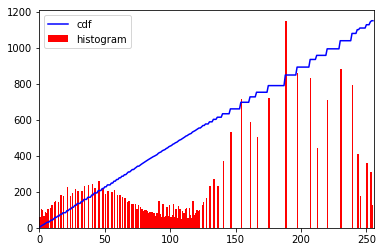

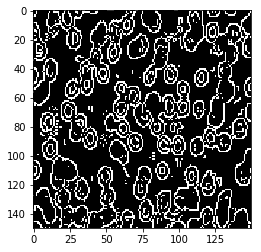

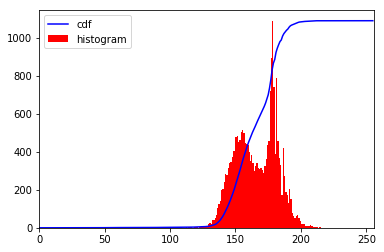

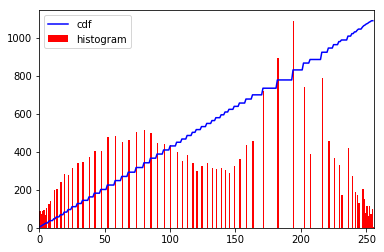

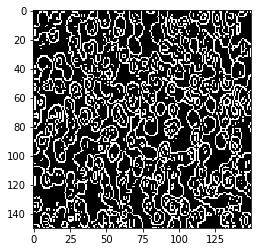

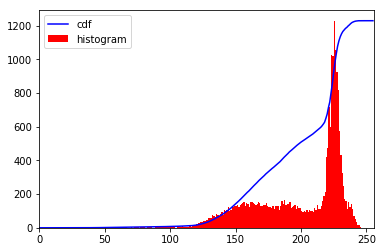

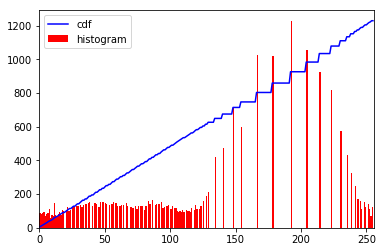

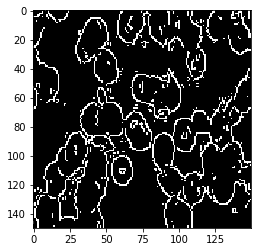

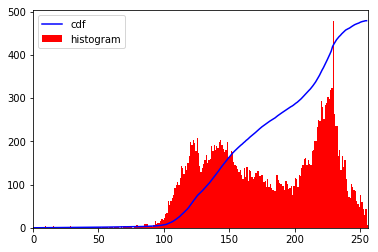

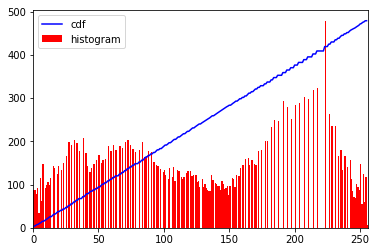

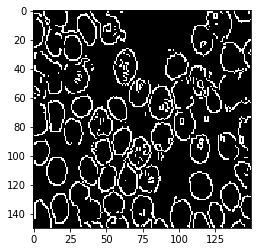

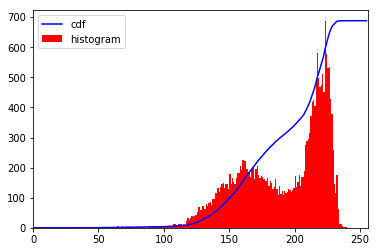

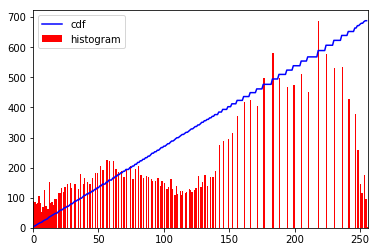

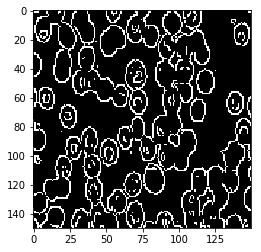

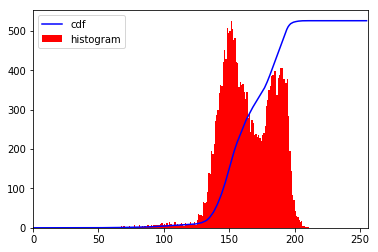

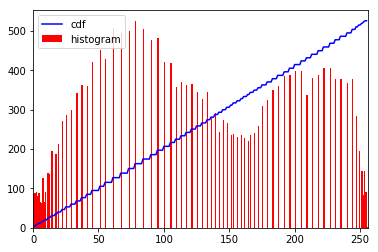

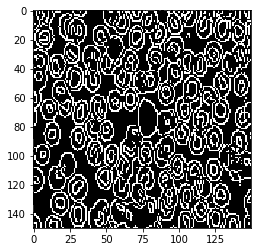

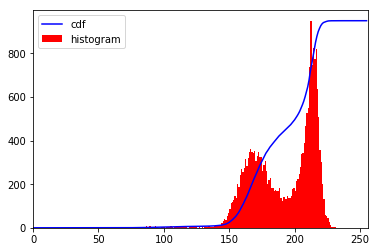

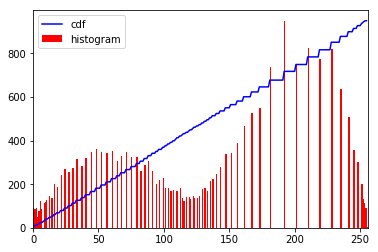

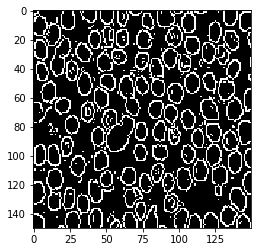

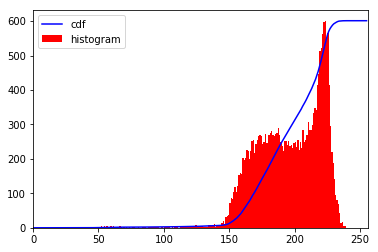

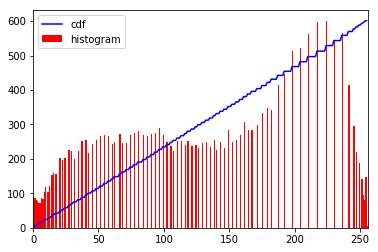

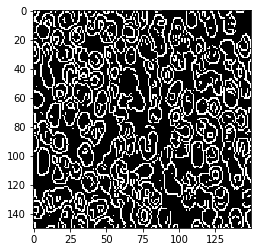

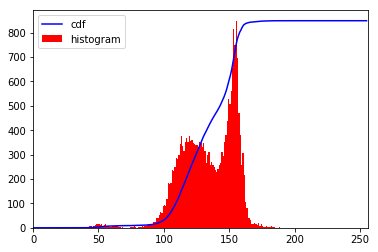

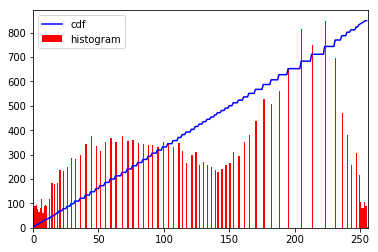

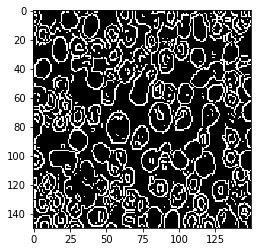

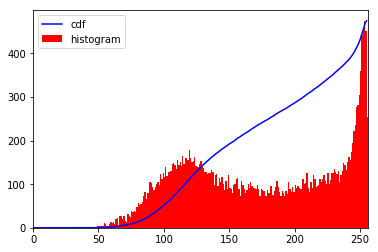

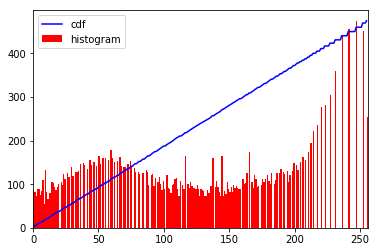

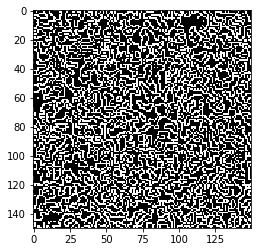

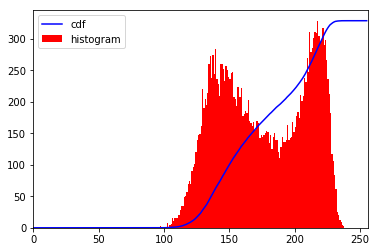

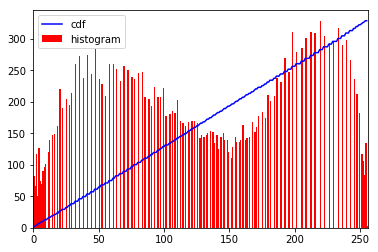

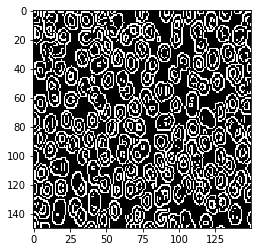

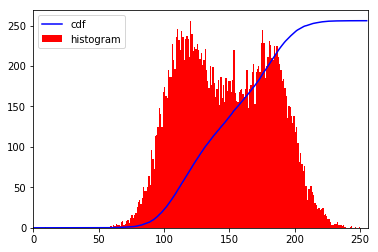

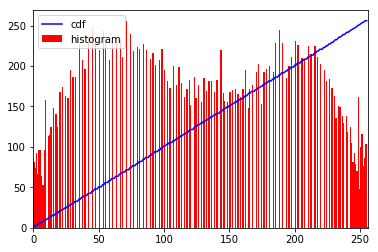

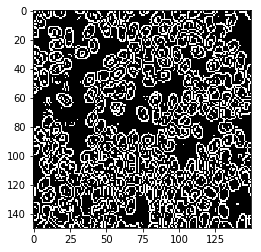

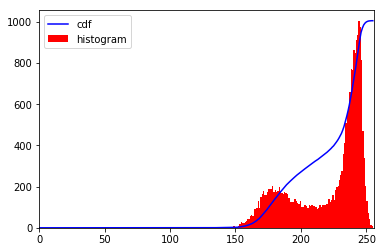

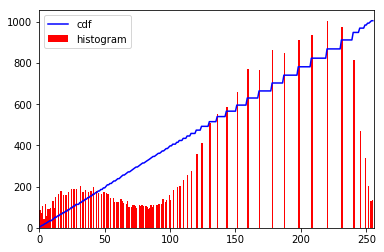

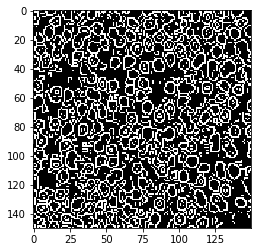

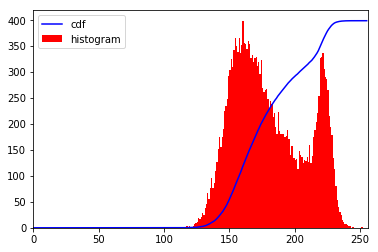

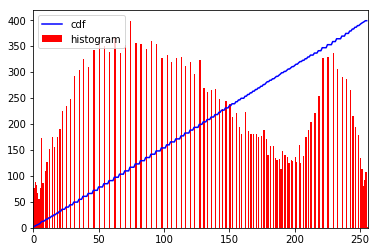

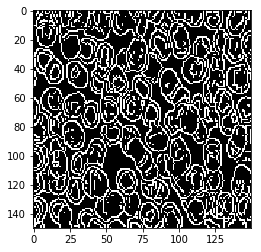

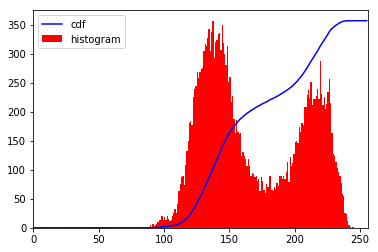

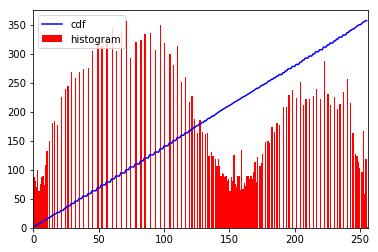

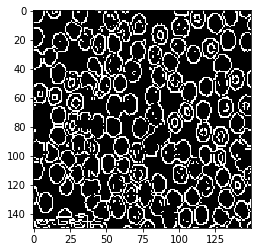

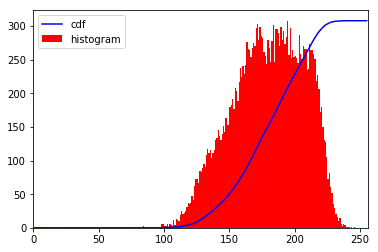

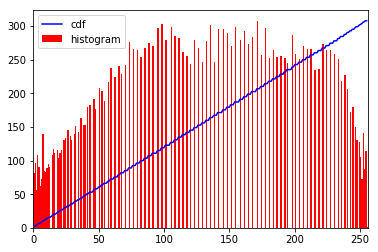

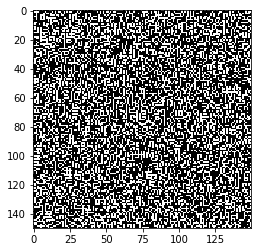

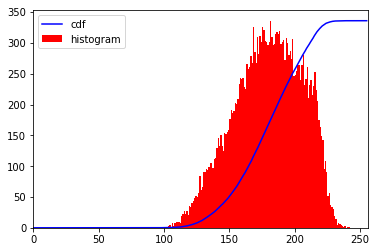

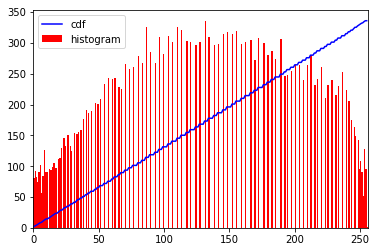

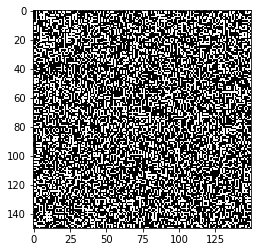

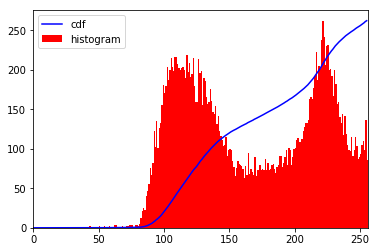

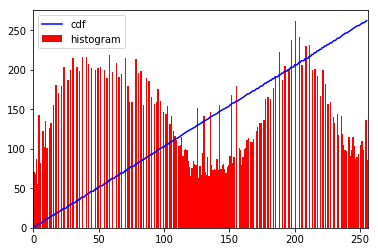

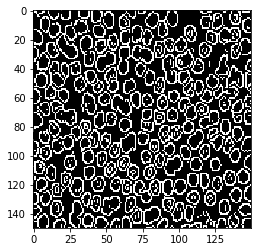

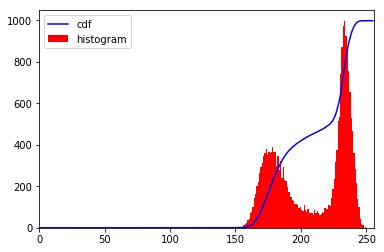

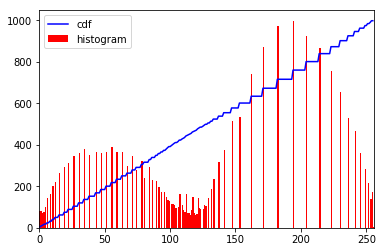

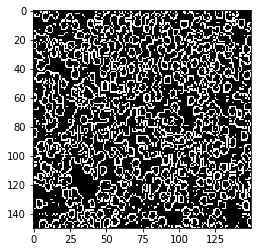

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR="D:\dataset"
CATEGORIES=["effected","healthy"]
def hist_eq(new_img):
    hist,bins=np.histogram(new_image.flatten(),256,[0,256])
    cdf=hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    plt.plot(cdf_normalized,color='b')
    plt.hist(new_image.flatten(),256,[0,256],color="r")
    #plt.xlim([0,256])
    #plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()
    
def convert_to_bin(new_img):
    ret,thresh1 = cv2.threshold(new_img,100,255,cv2.THRESH_BINARY)
    plt.imshow(thresh1,cmap="gray")
    plt.show()
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                #reads image  and converts the RGB image to Gray scale image
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                #image is reshaped to 150
                IMG_SIZE=150
                #store resized image in a new variable
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
                plt.show()
                #IMAGE ENHANCEMENT
                #performs local histogram equilization
                hist,bins=np.histogram(new_array.flatten(),256,[0,256])
                cdf=hist.cumsum()
                cdf_normalized = cdf * hist.max()/ cdf.max()
                plt.plot(cdf_normalized,color='b')
                plt.hist(new_array.flatten(),256,[0,256],color="r")
                plt.xlim([0,256])
                plt.legend(('cdf','histogram'), loc = 'upper left')
                plt.show()
                cdf_m=np.ma.masked_equal(cdf,0)
                cdf_m=(cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
                cdf=np.ma.filled(cdf_m,0).astype('uint8')
                #store the partially equivalized image in a new variable
                img2=cdf[new_array]
                #again perform local histogram equilization it enhances the gray scale image
                hist,bins=np.histogram(img2.flatten(),256,[0,256])
                cdf=hist.cumsum()
                cdf_normalized = cdf * hist.max()/ cdf.max()
                plt.plot(cdf_normalized,color='b')
                plt.hist(img2.flatten(),256,[0,256],color="r")
                plt.xlim([0,256])
                plt.legend(('cdf','histogram'), loc = 'upper left')
                plt.show()
                plt.imshow(img2,cmap="gray")
                #perform Canny edge detection algorithm to detect edges from background
                edges=cv2.Canny(img2,240,255)
                #plt.imshow(img2,cmap='gray')
                #plt.title('Original image'),plt.xticks([]),plt.yticks([])
                plt.imshow(edges,cmap='gray')
                #plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
                #plt.show(
                
            except Exception as e:
                pass
create_training_data()
    